1. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Обучите случайный лес, задав только гиперпараметры `n_estimators=100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков. 

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
data = load_wine()
data.feature_names
#print(data['DESCR'])

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
X = data.data
Y = data.target
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
a=len(data.feature_names)
ind = np.append(np.arange(2), np.arange(3, a))
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train[:, ind], y_train)

RandomForestRegressor(random_state=0)

12
12


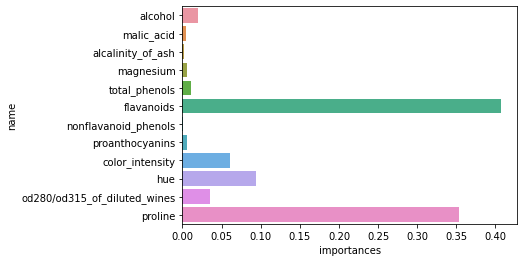

In [ ]:
import seaborn as sns
import pandas as pd
data.feature_names.pop(2)
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':data.feature_names})
sns.barplot(x="importances", y="name", data=feature_imp)
print(len(clf.feature_importances_))
print(len(data.feature_names))

In [ ]:
feature_imp
importances_list = feature_imp['importances'].to_list()
name_list = feature_imp['name'].to_list()
max_imp = max(importances_list)
index_max = importances_list.index(max_imp)
print("Самый важный признак -",name_list[index_max]) # самый важный признак        
# --------------------------------------------------------#
importances_list.pop(index_max)                           
name_list.pop(index_max)
max_imp2 = max(importances_list)
index_max2 = importances_list.index(max_imp2)
print('Второй важный признак -',name_list[index_max2]) # самый важный признак 2

Самый важный признак - flavanoids
Второй важный признак - proline


2. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Отмасштабируйте признаки, используя класс StandardScaler с гиперпараметрами по умолчанию. Обучите случайный лес, задав только гиперпараметры  `n_estimators = 100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков.

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
data = load_wine()
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
X = data.data
Y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train[:, ind])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
a=len(data.feature_names)
ind = np.append(np.arange(2), np.arange(3, a))
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(scaled_X_train, y_train)

RandomForestRegressor(random_state=0)

12
12


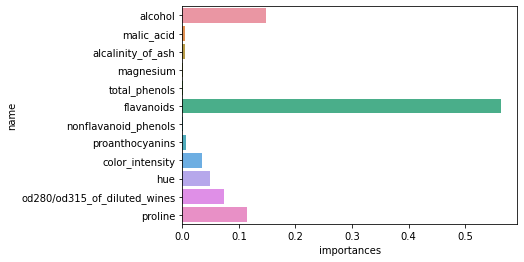

In [ ]:
data.feature_names.pop(2)
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':data.feature_names})
sns.barplot(x="importances", y="name", data=feature_imp)
print(len(clf.feature_importances_))
print(len(data.feature_names))

In [ ]:
importances_list = feature_imp['importances'].to_list()
name_list = feature_imp['name'].to_list()
max_imp = max(importances_list)
index_max = importances_list.index(max_imp)
print("Самый важный признак -",name_list[index_max]) # самый важный признак        
# --------------------------------------------------------#
importances_list.pop(index_max)                           
name_list.pop(index_max)
max_imp2 = max(importances_list)
index_max2 = importances_list.index(max_imp2)
print('Второй важный признак -',name_list[index_max2]) # самый важный признак 2

Самый важный признак - flavanoids
Второй важный признак - alcohol


Ниже приведена неполная реализация класса Bagging который имеет методы `fit` для обучения бэггинга над `DecisionTreeRegressor` и метод `predict` для предсказания. Допишите необходимый код, чтобы реализовать бэггинг.

используемы переменные в коде:
- `self.n_estimators`, `n_estimators` - число используемых деревьев
- `self.regressors` - список объектов класса `DecisionTreeRegressor`, к которым уже был применён метод `fit`
Данный список необъодимо заполнить в методе `fit` и использовать для предсказания в методе `predict`
- `ind`-  выбранные индексы объектов при бутстрапе

при создании объекта класса `DecisionTreeRegressor` зафиксируйте  
`random_state=0`

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
class Bagging():
  def __init__(self, n_estimators=10):
    self.n_estimators = n_estimators
    self.regressors = []

  def fit(self, x_train, y_train):
    for i in range(self.n_estimators):
      np.random.seed(i)
      ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
      clf.fit(x_train[ind], y_train[ind])
      
  def predict(self, x_test):
    res += clf.predict(x_test)
'''
Я не умею с классами работать, простите(((
'''

Загрузите данные приложенные к заданию

In [ ]:
import pandas as pd
from google.colab import files
uploder = files.upload()

Saving data.csv to data.csv


Положим матрицу объекты-признаки в переменную `X`, а ответы в переменную `y`

In [ ]:
Data = pd.read_csv('data.csv')
X, y = Data.iloc[:, :100], Data.iloc[:, 100]


Положим первые 6000 объектов в обучающую часть, остальные объекты в тестовую часть

In [ ]:
x_train, y_train = X[:6000], y[:6000]
x_test, y_test = X[6000:], y[6000:]

3. Обучите бэггинг на 1 дереве. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
res = np.zeros(x_test.shape[0])
N = 1
clf = DecisionTreeRegressor()
for i in range(N):
    ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
    clf.fit(x_train.iloc[ind], y_train.iloc[ind])
    res += clf.predict(x_test)
msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)

32.0

4. Обучите бэггинг на 5 деревьях. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.metrics import mean_squared_error
res = np.zeros(x_test.shape[0])
N = 5
clf = DecisionTreeRegressor()
for i in range(N):
    ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
    clf.fit(x_train.iloc[ind], y_train.iloc[ind])
    res += clf.predict(x_test)
msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)

16.0

5. Обучите бэггинг на 100 деревьях. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.metrics import mean_squared_error
res = np.zeros(x_test.shape[0])
N = 100
clf = DecisionTreeRegressor()
for i in range(N):
    ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
    clf.fit(x_train.iloc[ind], y_train.iloc[ind])
    res += clf.predict(x_test)
msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)

11.0

6. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1, random_state=0)
clf.fit(x_train, y_train)
msq = mean_squared_error(y_test, clf.predict(x_test))
#msq = mean_squared_error(y_test, res/N)
print(round(msq/1000,0))
print(msq/1000)

34.0
34.439851591389555


7. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

8. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 5`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=5, random_state=0)
clf.fit(x_train, y_train)
msq = mean_squared_error(y_test, clf.predict(x_test))
#msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)

15.0

9. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 100`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
msq = mean_squared_error(y_test, clf.predict(x_test))
msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)

11.0

10. Изучите документацию и разберитесь как посчитать Out-of-bag ошибку в RandomForestRegressor. Обучите RandomForestRegressor с гиперпараметром n_estimators=100 на обучающей части, зафиксируйте  
`random_state=0`. Найдите Out-of-bag ошибку алгоритма. Ответ округлите до сотых.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, random_state=0, oob_score = True)
clf.fit(x_train, y_train)
msq = mean_squared_error(y_test, clf.predict(x_test))
msq = mean_squared_error(y_test, res/N)
round(msq/1000,0)
print('oob =',clf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


oob = 0.7527486101765168


In [ ]:
round(clf.oob_score_,2)

0.75